In [1]:

import sys
# setting path
sys.path.append('../lib')
from lib import *
# from lib import plot, plot_with_std

# %matplotlib inline
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns 
# sns.set(style="darkgrid")

df = pd.read_csv('../data/fortune500.csv')

year         int64
rank         int64
company     object
revenue    float64
profit     float64
dtype: object

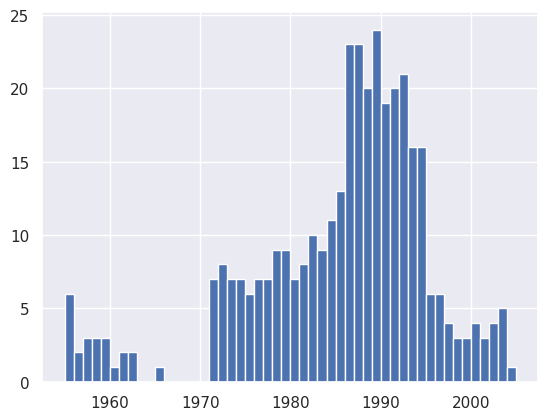

In [2]:
df.columns = ['year', 'rank', 'company', 'revenue', 'profit']
# df.dtypes
non_numberic_profits = df.profit.str.contains('[^0-9.-]')
set(df.profit[non_numberic_profits])
bin_sizes, _, _ = plt.hist(df.year[non_numberic_profits], bins=range(1955, 2006))
df = df.loc[~non_numberic_profits]
df.profit = df.profit.apply(pd.to_numeric)
len(df)
df.dtypes


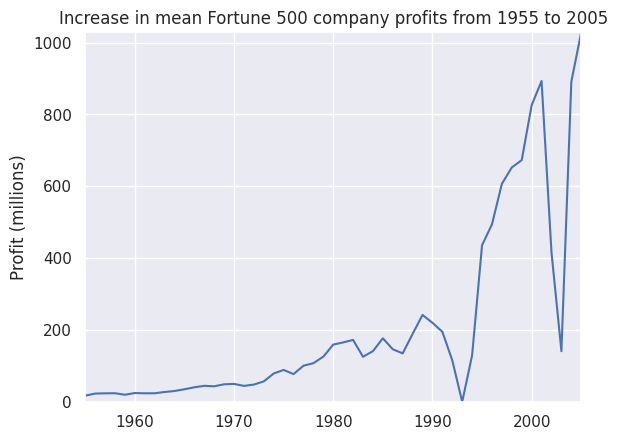

In [3]:
group_by_year = df.loc[:, ['year', 'revenue', 'profit']].groupby('year')
avgs = group_by_year.mean()
x = avgs.index
y1 = avgs.profit
# def plot(x, y, ax, title, y_label):
#     ax.set_title(title)
#     ax.set_ylabel(y_label)
#     ax.plot(x, y)
#     ax.margins(x=0, y=0)
fig, ax = plt.subplots()
plot(x, y1, ax, 'Increase in mean Fortune 500 company profits from 1955 to 2005', 'Profit (millions)')

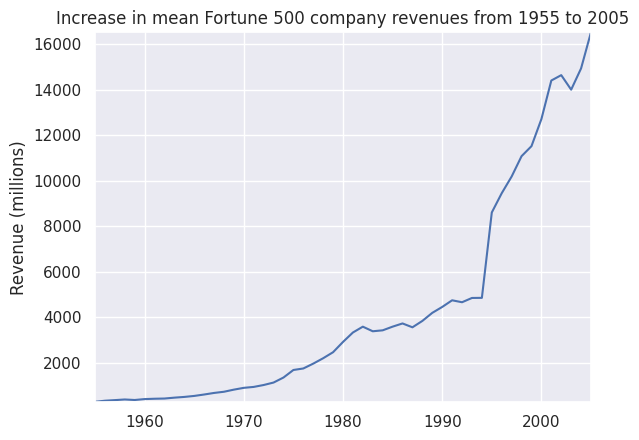

In [4]:
y2 = avgs.revenue
fig, ax = plt.subplots()
plot(x, y2, ax, 'Increase in mean Fortune 500 company revenues from 1955 to 2005', 'Revenue (millions)')

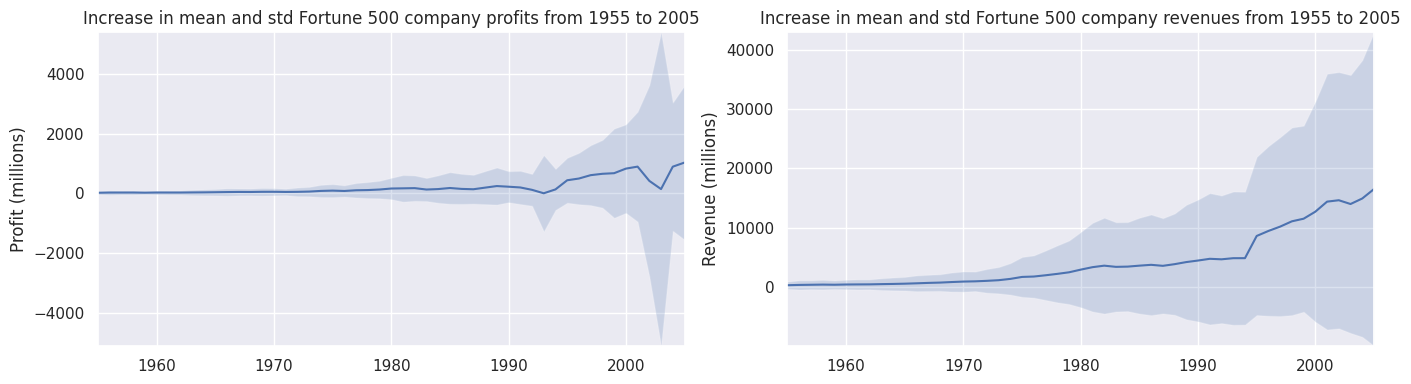

In [5]:
# def plot_with_std(x, y, stds, ax, title, y_label):
#     ax.fill_between(x, y - stds, y + stds, alpha=0.2)
#     plot(x, y, ax, title, y_label)
fig, (ax1, ax2) = plt.subplots(ncols=2)
title = 'Increase in mean and std Fortune 500 company %s from 1955 to 2005'
stds1 = group_by_year.std().profit.values
stds2 = group_by_year.std().revenue.values
plot_with_std(x, y1.values, stds1, ax1, title % 'profits', 'Profit (millions)')
plot_with_std(x, y2.values, stds2, ax2, title % 'revenues', 'Revenue (millions)')
fig.set_size_inches(14, 4)
fig.tight_layout()